In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [3]:
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

In [4]:
gong = pd.read_csv('/Users/iyunhan/Documents/data2.csv')

# Normalization 최소값 0 / 최대값 1
# 이상치가 적기 때문에 데이터 표준화 방법으로 MinMax방법을 사용했다.
scaler = MinMaxScaler()

scaler = scaler.fit_transform(gong)


/Users/iyunhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:400: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/Users/iyunhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:401: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [5]:
#로지스틱 회귀분석
X = scaler[:,:6]
y = scaler[:,6]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

log = LogisticRegression() #로지스틱 회귀분석 시행
log.fit(x_train, y_train) #모델의 정확도 확인
print('학습용 데이터셋 정확도 : %.2f' % log.score(x_train, y_train))
print('검증용 데이터셋 정확도 : %.2f' % log.score(x_test, y_test))

type(scaler)

학습용 데이터셋 정확도 : 0.70
검증용 데이터셋 정확도 : 0.64


numpy.ndarray

In [5]:
model = sm.Logit(y_train, x_train)
results = model.fit(method = "newton") 
results.summary()

Optimization terminated successfully.
         Current function value: 0.524386
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  463
Model:                          Logit   Df Residuals:                      457
Method:                           MLE   Df Model:                            5
Date:                Tue, 08 Jun 2021   Pseudo R-squ.:                  0.1106
Time:                        19:30:26   Log-Likelihood:                -242.79
converged:                       True   LL-Null:                       -272.97
Covariance Type:            nonrobust   LLR p-value:                 1.021e-11
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.4393      0.351      6.954      0.000       1.752       3.127
x2             0.1422      0.477      0.298      0.766      -0.794       1.078
x3            -0.0409      0.231     -0.177      0.859      -0.493       0.412
x4            -2.1629      0.400     -5.408      0.000      -2.947      -1.379
x5            -0.7493      0.422     -1.775      0.076      -1.577       0.078
x6            -0.1751      0.624     -0.281      0.779      -1.398       1.047
==============================================================================
"""

In [6]:
#회귀계수 출력 
np.exp(results.params)

array([11.46479931,  1.15283425,  0.95994859,  0.11499228,  0.4726834 ,
        0.83940768])

In [8]:

pred_y = results.predict(x_test) # y예측, 1이 될 확률을 나타낸 결과

def cut(y, threshold): # 임계값 설정 함수
    Y = y.copy()
    Y[Y>threshold] = 1
    Y[Y<threshold] = 0
    return Y.astype(int)

pred_Y = cut(pred_y, 0.5) # 임계값에 따라 일정 값을 넘으면 1로 라벨링 되게 함
pred_Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [9]:
from sklearn.metrics import confusion_matrix
cfmat = confusion_matrix(y_test,pred_Y)
print(cfmat)

def acc(cfmat):
    return (cfmat[0,0] + cfmat[1,1])/(cfmat[0,0] + cfmat[1,1] + cfmat[0,1] + cfmat[1,0])

acc(cfmat)

#로지스틱 회귀분석

[[123  18]
 [ 53   5]]


0.6432160804020101

In [10]:
# K-최근접이웃 

In [11]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [12]:
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

In [13]:

gong = pd.read_csv('/Users/iyunhan/Documents/data2.csv')

# Normalization 최소값 0 / 최대값 1
# 이상치가 적기 때문에 데이터 표준화 방법으로 MinMax방법을 사용했다.
scaler = MinMaxScaler()

scaler = scaler.fit_transform(gong)

X = scaler[:,:6]
y = scaler[:,6]



/Users/iyunhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:400: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/Users/iyunhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:401: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 100)
clf = neighbors.KNeighborsClassifier(n_neighbors =20)
modelK = clf.fit(X_train , y_train)
print(clf.score(X_test, y_test))


0.8241206030150754


In [17]:
#경기도 지역의 우수한 공연 

pred_y = modelK.predict(x_test) # y예측, 1이 될 확률을 나타낸 결과

def cut(y, threshold): # 임계값 설정 함수
    Y = y.copy()
    Y[Y>threshold] = 1
    Y[Y<threshold] = 0
    return Y.astype(int)

pred_Y = cut(pred_y, 0.8) # 임계값에 따라 일정 값을 넘으면 1로 라벨링 되게 함
pred_Y

array([1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0])

In [18]:

pred_y = modelK.predict(X_test) # y예측, 1이 될 확률을 나타낸 결과

def cut(y, threshold): # 임계값 설정 함수
    Y = y.copy()
    Y[Y>threshold] = 1
    Y[Y<threshold] = 0
    return Y.astype(int)

pred_Y = cut(pred_y, 0.1) # 임계값에 따라 일정 값을 넘으면 1로 라벨링 되게 함
pred_Y

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0])

Test = pd.read_csv('/Users/iyunhan/Documents/2020공연.csv')
scaler = MinMaxScaler()

test2020 = Test_Y[:49,:]
clf.predict(test2020)



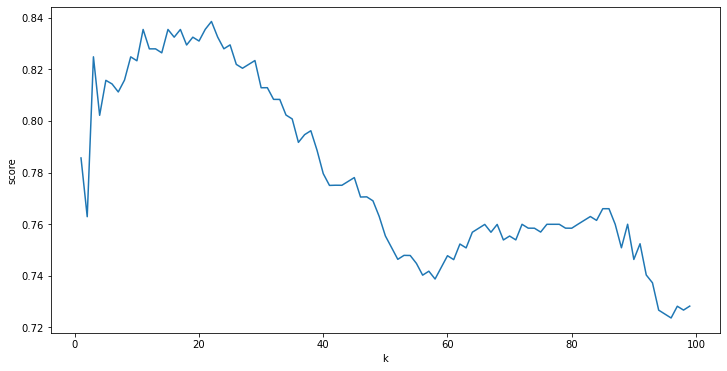

In [21]:
from sklearn.model_selection import cross_val_score

scores = []
for k in range(1,100):
    clf = neighbors.KNeighborsClassifier(n_neighbors = k)
    score = cross_val_score(clf, X, y, cv=10, scoring = 'accuracy')
    scores.append(score.mean())
    
plt.figure(figsize = (12,6))
plt.plot(range(1,100),scores)
plt.xlabel("k")
plt.ylabel("score")
plt.show()

#아래의 그래프로 판단했을때 k는 약 20에서 최적값을 가지므로 위에 nn값을 20으로 설정하여 좋은 스코어값을 얻어낸다.

In [22]:
Test = pd.read_csv('/Users/iyunhan/Documents/2020공연.csv')

# Normalization 최소값 0 / 최대값 1
# 이상치가 적기 때문에 데이터 표준화 방법으로 MinMax방법을 사용했다.
scaler = MinMaxScaler()

Test_Y = scaler.fit_transform(Test)

#PRED_Y = clf.predict(Test_Y)


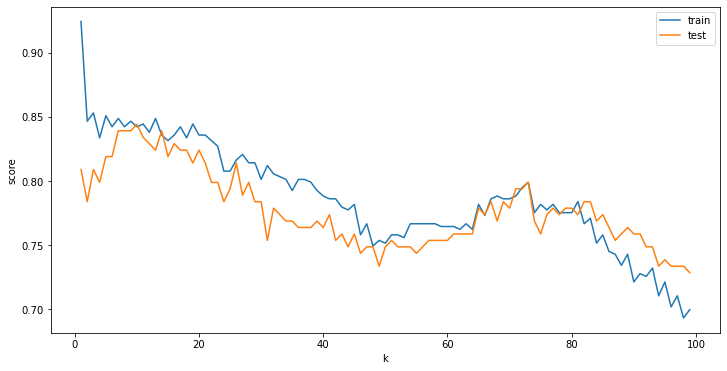

In [23]:
train_scores = []
test_scores = []
for k in range(1,100):
    clf = neighbors.KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train, y_train)
    
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    train_scores.append(train_score)
    test_scores.append(test_score)

plt.figure(figsize = (12,6))
plt.plot(range(1,100), train_scores, label = 'train')
plt.plot(range(1,100), test_scores, label = 'test')
plt.legend()
plt.xlabel('k')
plt.ylabel('score')
plt.show()
# 처음엔 언더피팅 현상이 보이고 test셋과 train셋과 비슷한 경향의 그래프가 보이고, k>20일 때 부터 
# 오버피팅 현상이 보인다. 

In [24]:
gong = pd.read_csv('/Users/iyunhan/Documents/data2.csv')

# Normalization 최소값 0 / 최대값 1
# 이상치가 적기 때문에 데이터 표준화 방법으로 MinMax방법을 사용했다.
scaler = MinMaxScaler()

scaler = scaler.fit_transform(gong)

from sklearn.tree import DecisionTreeClassifier

train_X, test_X, train_y, test_y = train_test_split(X,y,train_size = 0.7, test_size=0.3, random_state=42)

tree_clf = DecisionTreeClassifier(max_depth = 10)
tree_clf.fit(X,y)

/Users/iyunhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:400: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/Users/iyunhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:401: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


DecisionTreeClassifier(max_depth=10)

In [25]:
y_pred = tree_clf.predict(test_X)
y_pred

array([1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [26]:
#Test2020 = pd.read_csv('/Users/iyunhan/Documents/2021gong.csv')
scaler = MinMaxScaler()

test__Y = scaler.fit_transform(Test2020)


pred_Y = tree_clf.predict(test__Y[:,:6])
pred_Y



/Users/iyunhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:400: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/Users/iyunhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:401: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [73]:
from sklearn.metrics import accuracy_score

print(format(accuracy_score(y_pred, test_y)*100))

92.96482412060301


In [75]:
train_X.shape

(463, 6)

In [76]:
sigak = pd.read_csv('/Users/iyunhan/Documents/Sigak.csv')

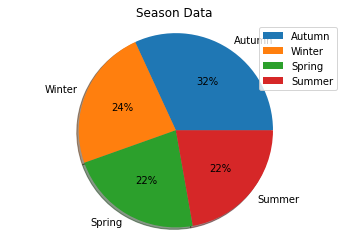

In [77]:
labels = ['Autumn','Winter','Spring','Summer']
fracs1 = sigak['계절'].value_counts().values.tolist()
explode = (0,0,0,0)
categories = ['Autumn','Winter','Spring','Summer']
plt.pie(fracs1, explode=explode, labels=labels, autopct = '%.0f%%', shadow = True)
plt.title('Season Data')
plt.legend(categories)
plt.axis('equal')
plt.show()

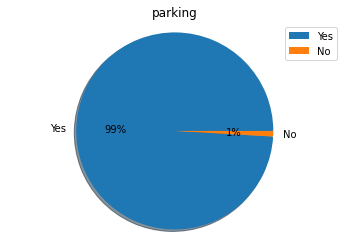

In [78]:

labels = ['Yes','No']
fracs1 = sigak['주차장변수'].value_counts().values.tolist()
explode = (0,0)
categories = ['Yes','No']
plt.pie(fracs1, explode=explode, labels=labels, autopct = '%.0f%%', shadow = True)
plt.title('parking')
plt.legend(categories)
plt.axis('equal')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

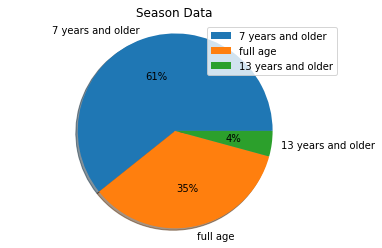

In [79]:

labels = ['7 years and older','full age','13 years and older']
fracs1 = sigak['입장연령변수'].value_counts().values.tolist()
explode = (0,0,0)
categories = ['7 years and older','full age','13 years and older']
plt.pie(fracs1, explode=explode, labels=labels, autopct = '%.0f%%', shadow = True)
plt.title('Season Data')
plt.legend(categories)
plt.axis('equal')
plt.show


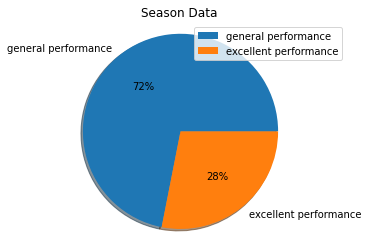

In [80]:

labels = ['general performance','excellent performance']
fracs1 = sigak['우수여부'].value_counts().values.tolist()
explode = (0,0)
categories = ['general performance','excellent performance']
plt.pie(fracs1, explode=explode, labels=labels, autopct = '%.0f%%', shadow = True)
plt.title('Season Data')
plt.legend(categories)
plt.axis('equal')
plt.show()

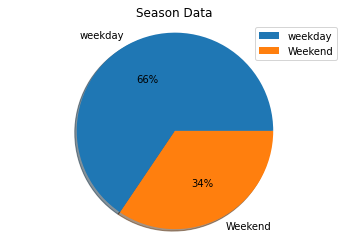

In [81]:
#겨울 156 가을 213 봄 148개 여름 147개 
labels = ['weekday','Weekend']
fracs1 = sigak['주말/평일'].value_counts().values.tolist()
explode = (0,0)
categories = ['weekday','Weekend']
plt.pie(fracs1, explode=explode, labels=labels, autopct = '%.0f%%', shadow = True)
plt.title('Season Data')
plt.legend(categories)
plt.axis('equal')
plt.show()